In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import xgboost
from sklearn.metrics import mean_absolute_percentage_error
from joblib import dump, load



# Constant paths 

In [14]:
# Data files PATH:
path_1 = r'cost_data.csv'
path_2 = r'features_basic'
path_3 = r'features_anomalies_removed'

In [82]:
def plot_split_training_prediction(parquet_path, col_subset=col_subset, show_plot=False, save=False, model_save_path=''):
    """
    It takes a parquet file as input, and outputs the predictions of the model on the last 100 rows of
    the parquet file.
    
    :param parquet_path: The path to the parquet file you want to use for training
    :param show_plot: If True, will show the plot of the prediction, defaults to False (optional)
    :param save: If True, the model will be saved to the specified path, defaults to False (optional)
    :param model_save_path: the path to save the model to
    :return: the test and prediction values for the model. and mape score.
    """

    df = pd.read_parquet(parquet_path)
    df2 = df[col_subset]
    df2 = df2[df2.horizon == 1]
    df2.drop(['horizon', 'level_0'], axis=1, inplace=True)
    model = xgboost.XGBRegressor()
    X_train = df2.iloc[:-100, 1:]
    X_test = df2.iloc[-100:, 1:]
    y_train = df2.y[:-100]
    y_test = df2.y[-100:]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    if show_plot:
        #plt.plot(df2.y,alpha=0.2)
        plt.plot(y_test,label='y_test')
        plt.plot(y_test.index,y_pred, label='y_pred')
        plt.title(parquet_path+f'\nMAPE:{mape}')
        plt.legend()
        plt.ylabel('y')
        plt.show()
    if save:
        dump(model, os.path.join(model_save_path,
                                 f'{parquet_path[:-8]}_mape_{mape:.2f}.joblib'))
    return y_test, y_pred, mape


In [83]:
fnames = os.listdir(path_3)
media_live_fnames = [x for x in fnames if 'AWS_Elemental_MediaLive' in x and(x.endswith('parquet'))]

In [87]:
col_subset = ['level_0', 'timestamp_1d', 'horizon', 'y', 'current:se:events-time_event_type=month_start:first',
       'time:day_of_week', 'time:day_of_month', 'time:month_of_quarter',
       'time:odd_month', 'time:middle_of_month']

In [88]:
parquet_path

'features_anomalies_removed\\bc.SSSk9gweBLBEt.acc_34.AWS_Elemental_MediaLive.total_cost-forecast-data.parquet'

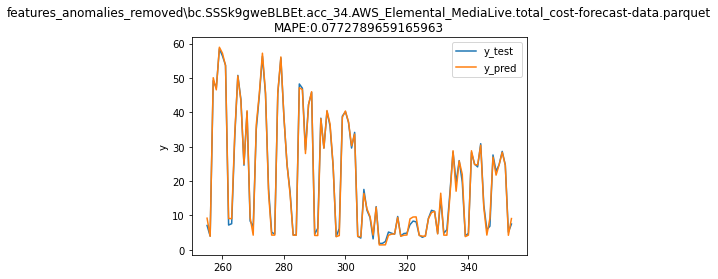

In [89]:
parquet_path =  os.path.join('features_anomalies_removed',media_live_fnames[3])
model_save_path = r'C:\Users\Aaron\Documents\YDATA\anodot\saved_models'

y_test,y_pred,mape  = plot_split_training_prediction(parquet_path,col_subset=col_subset,show_plot=True,save=True,model_save_path=model_save_path)

In [63]:
df = pd.read_parquet(os.path.join(path_3,media_live_fnames[2]))

In [38]:
#df = df[col_subset]
df = df[df.horizon==1]


In [39]:
df['acc_number'] = df.level_0.str.split('.').str[2]

In [40]:
df.groupby('acc_number').count()

,level_0,timestamp_1d,horizon,y,avg_lb1:y,lag1:y,lag2:y,lag3:y,lag4:y,lag5:y,...,win:5:se:events-time_event_type=quarter_start:first,win:6:se:events-time_event_type=quarter_start:first,win:7:se:events-time_event_type=quarter_start:first,win:8:se:events-time_event_type=quarter_start:first,win:9:se:events-time_event_type=quarter_start:first,time:day_of_week,time:day_of_month,time:month_of_quarter,time:odd_month,time:middle_of_month
acc_number,,,,,,,,,,,,,,,,,,,,,
acc_33,54,54,54,54,47,47,47,47,47,47,...,54,54,54,54,54,54,54,54,54,54


In [41]:
df2 = df[col_subset]
df2 = df2[df2.horizon==1]
df2.drop(['horizon','level_0'],axis=1,inplace=True)

In [42]:

model = xgboost.XGBRegressor()

In [51]:
def plot_split_training_prediction(parquet_path):
    df = pd.read_parquet(parquet_path)
    df2 = df[col_subset]
    df2 = df2[df2.horizon==1]
    df2.drop(['horizon','level_0'],axis=1,inplace=True)
    model = xgboost.XGBRegressor()
    X_train = df2.iloc[:-100,1:]
    X_test = df2.iloc[-100:,1:]
    y_train = df2.y[:-100]
    y_test = df2.y[-100:]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #plt.plot()
    plt.plot(y_test.values)
    plt.plot(y_pred)
    plt.show()
    return y_test,y_pred 


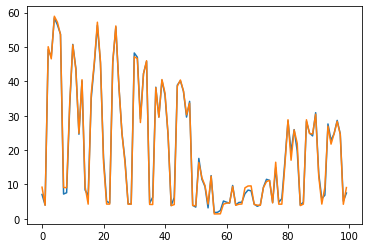

In [52]:
parquet_path =  os.path.join('features_anomalies_removed',media_live_fnames[3])
y_test,y_pred  = plot_split_training_prediction(parquet_path)

In [ ]:
from joblib import dump, load
dump(clf, 'filename.joblib') 
clf = load('filename.joblib') 

In [139]:
from sklearn.metrics import mean_absolute_percentage_error

In [143]:
mean_absolute_percentage_error(y_test,y_pred )

0.0772789659165963

In [145]:
parquet_path 

'features_anomalies_removed\\bc.SSSk9gweBLBEt.acc_34.AWS_Elemental_MediaLive.total_cost-forecast-data.parquet'

In [154]:
fname = f'{parquet_path[:-8]}_mape_{mean_absolute_percentage_error(y_test,y_pred):.2f}.joblib'

features_anomalies_removed\bc.SSSk9gweBLBEt.acc_34.AWS_Elemental_MediaLive.total_cost-forecast-data_mape_0.08.joblib


In [ ]:
print(f'mape{mean_absolute_percentage_error(y_test,y_pred):.2f}')

In [156]:
def plot_split_training_prediction(parquet_path,save=False):
    df = pd.read_parquet(parquet_path)
    df2 = df[col_subset]
    df2 = df2[df2.horizon==1]
    df2.drop(['horizon','level_0'],axis=1,inplace=True)
    model = xgboost.XGBRegressor()
    X_train = df2.iloc[:-100,1:]
    X_test = df2.iloc[-100:,1:]
    y_train = df2.y[:-100]
    y_test = df2.y[-100:]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    plt.plot(y_test.values)
    plt.plot(y_pred)
    plt.show()
    mape = mean_absolute_percentage_error(y_test,y_pred )
    if save:
        dump(model, f'{parquet_path[:-8]}_mape_{mape:.2f}.joblib') 
    return y_test,y_pred 


In [95]:
df2.shape

(355, 8)

In [103]:
X_train = df2.iloc[:-100,1:]
X_test = df2.iloc[-100:,1:]
y_train = df2.y[:-100]
y_test = df2.y[-100:]

In [105]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
import matplotlib.pyplot as plt

In [109]:
y_test

255    0.480000
256    0.480000
257    0.552754
258    0.480000
259    0.480000
         ...   
350    0.360000
351    0.360000
352    0.360000
353    0.360000
354    0.360000
Name: y, Length: 100, dtype: float64

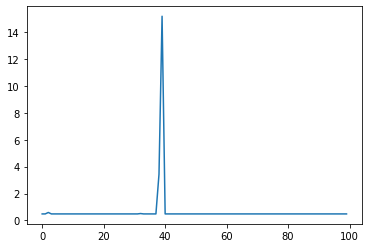

In [112]:
plt.plot(model.predict(X_test))

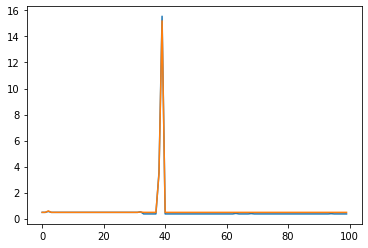

In [110]:
plt.plot(y_test.values)
plt.plot(model.predict(X_test))


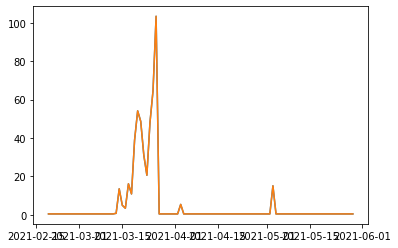

In [94]:

plt.plot(df2.timestamp_1d[:100],model.predict(df2.iloc[:,1:][:100]))



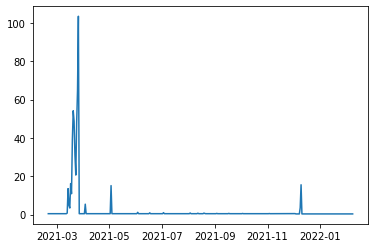

In [93]:
plt.plot(df2.timestamp_1d[:],model.predict(df2.iloc[:,1:]))


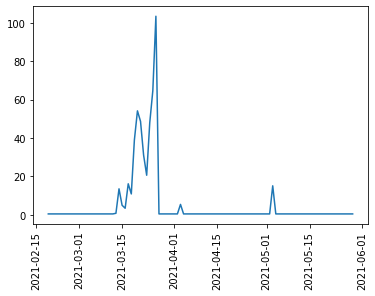

In [57]:
plt.plot(df2.timestamp_1d[0:100],df2.y[0:100])
_ = plt.xticks(rotation=90)


(0.0, 500.0)

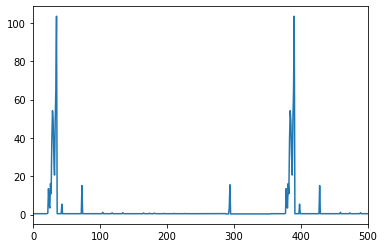

In [50]:
df2.y.plot()
plt.xlim(0,500)

In [ ]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

In [ ]:
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, 1], predictions

In [5]:
[x.split('.')[3] for x in fnames]

['AmazonCloudWatch',
 'Amazon_CloudFront',
 'Amazon_EC2_Container_Registry_[ECR]',
 'Amazon_ElastiCache',
 'Amazon_Elastic_Compute_Cloud',
 'Amazon_Elastic_Container_Service_for_Kubernetes',
 'Amazon_Kinesis',
 'Amazon_Route_53',
 'Amazon_Simple_Notification_Service',
 'Amazon_Simple_Notification_Service',
 'Amazon_Simple_Storage_Service',
 'Amazon_Virtual_Private_Cloud',
 'AWS_CloudTrail',
 'AWS_Directory_Service',
 'AWS_Key_Management_Service',
 'AWS_Lambda',
 'AWS_Secrets_Manager',
 'AWS_WAF',
 'Data_Transfer',
 'OpenVPN_Access_Server_[10_Connected_Devices]',
 'Tax',
 'AmazonCloudWatch',
 'Amazon_GuardDuty',
 'Amazon_Simple_Notification_Service',
 'Amazon_Simple_Queue_Service',
 'Amazon_Simple_Storage_Service',
 'Amazon_Virtual_Private_Cloud',
 'AWS_CloudTrail',
 'AWS_Key_Management_Service',
 'AWS_Lambda',
 'AWS_Secrets_Manager',
 'Data_Transfer',
 'AmazonCloudWatch',
 'Amazon_CloudFront',
 'Amazon_EC2_Container_Registry_[ECR]',
 'Amazon_Elastic_Compute_Cloud',
 'Amazon_Elastic_Con

In [7]:
arr = np.array([x.split('.')[3] for x in fnames])

In [8]:
arr

array(['AmazonCloudWatch', 'Amazon_CloudFront',
       'Amazon_EC2_Container_Registry_[ECR]', ...,
       'F5_Rules_for_AWS_WAF_-_Bot_Protection_Rules',
       'F5_Rules_for_AWS_WAF_-_Common_Vulnerabilities___Exposures_[CVE]_Rules',
       'Savings_Plans_for_AWS_Compute_usage'], dtype='<U69')

In [20]:
np.unique(arr,return_counts=True)

(array(['AWS_Backup', 'AWS_Budgets', 'AWS_CloudHSM', 'AWS_CloudTrail',
        'AWS_CodeArtifact', 'AWS_Config', 'AWS_Cost_Explorer',
        'AWS_Database_Migration_Service', 'AWS_Direct_Connect',
        'AWS_Directory_Service', 'AWS_Elemental_MediaConnect',
        'AWS_Elemental_MediaConvert', 'AWS_Elemental_MediaLive',
        'AWS_Elemental_MediaPackage', 'AWS_Elemental_MediaStore',
        'AWS_Global_Accelerator', 'AWS_Glue', 'AWS_IoT',
        'AWS_Key_Management_Service', 'AWS_Lambda', 'AWS_Secrets_Manager',
        'AWS_Security_Hub', 'AWS_Shield', 'AWS_Step_Functions',
        'AWS_Systems_Manager', 'AWS_Transfer_Family', 'AWS_WAF',
        'AWS_X-Ray', 'AmazonCloudWatch', 'AmazonWorkMail',
        'Amazon_API_Gateway', 'Amazon_Athena', 'Amazon_Chime',
        'Amazon_Chime_Dialin', 'Amazon_CloudFront', 'Amazon_Cognito',
        'Amazon_DocumentDB_[with_MongoDB_compatibility]',
        'Amazon_DynamoDB', 'Amazon_EC2_Container_Registry_[ECR]',
        'Amazon_ElastiCache', '

In [14]:
b

array([ 2,  2,  2, 73,  4, 11,  7,  2,  2,  6,  4,  1, 13,  9,  1,  7, 20,
        4, 43, 36, 33,  5,  3,  5,  5,  7, 16,  1, 71,  2, 10,  8,  1,  1,
       37,  7,  4, 14, 32, 23, 44,  4, 22, 12,  3,  8,  3, 13,  2,  6, 10,
        1,  1,  5,  2,  8,  2,  2,  2,  1,  1, 22, 29,  3,  1,  8, 39, 28,
       76,  2,  1, 26,  2,  1,  1,  2,  1,  2, 73,  1,  1, 35,  4,  3,  1,
        1,  8,  7, 27,  2,  1,  1], dtype=int64)

In [11]:
np.argmax(b)

68

In [76]:
df2

,level_0,timestamp_1d,horizon,y,current:se:events-time_event_type=month_start:first,time:day_of_week,time:day_of_month,time:month_of_quarter,time:odd_month,time:middle_of_month
0,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2021-02-19,1,0.48,False,5,20,2,0,0
1,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2021-02-20,1,0.48,False,6,21,2,0,0
2,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2021-02-21,1,0.48,False,0,22,2,0,0
3,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2021-02-22,1,0.48,False,1,23,2,0,0
4,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2021-02-23,1,0.48,False,2,24,2,0,0
...,...,...,...,...,...,...,...,...,...,...
350,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2022-02-04,1,0.36,False,5,5,2,0,0
351,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2022-02-05,1,0.36,False,6,6,2,0,0
352,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2022-02-06,1,0.36,False,0,7,2,0,0
353,bc.SSSk9gweBLBEt.acc_14.AWS_Elemental_MediaLiv...,2022-02-07,1,0.36,False,1,8,2,0,0


In [71]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions
 
# load the dataset
series = df2
values = series.y
# transform the time series data into supervised learning
data = series_to_supervised(values)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

IndexError: tuple index out of range

In [72]:
data = series_to_supervised(df2)